In [313]:
import pandas as pd
import numpy as np

## Format ratio

In [368]:
# #Load the dataset:
dfs = pd.read_csv('results/master/success_rate.csv', on_bad_lines='warn')



import csv


# with open('results/master/success_rate.csv', newline='', encoding='utf-8') as f:
#     reader = csv.reader(f)
#     rows = list(reader)
#     for row in rows:
#         print(row)




/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_85760/1456539737.py:2: ParserWarning: Skipping line 317: expected 2 fields, saw 4
Skipping line 318: expected 2 fields, saw 4
Skipping line 319: expected 2 fields, saw 3
Skipping line 320: expected 2 fields, saw 4
Skipping line 321: expected 2 fields, saw 3
Skipping line 322: expected 2 fields, saw 4
Skipping line 323: expected 2 fields, saw 53
Skipping line 324: expected 2 fields, saw 3
Skipping line 325: expected 2 fields, saw 5
Skipping line 326: expected 2 fields, saw 3
Skipping line 327: expected 2 fields, saw 4
Skipping line 328: expected 2 fields, saw 3
Skipping line 330: expected 2 fields, saw 4
Skipping line 331: expected 2 fields, saw 3
Skipping line 333: expected 2 fields, saw 4
Skipping line 334: expected 2 fields, saw 3
Skipping line 335: expected 2 fields, saw 4
Skipping line 336: expected 2 fields, saw 3
Skipping line 337: expected 2 fields, saw 3
Skipping line 339: expected 2 fields, saw 12
Skipping line 343: ex

In [369]:
dfs['Success'].value_counts()

Success
True     324
False    110
Name: count, dtype: int64

In [370]:
success = dfs['Success'].value_counts()[True]
fail = dfs['Success'].value_counts()[False]
total = len(dfs)

print(f"Ratio success: {success}/{total}")
print(f"percent: {round(success/total*100,2)}%")

Ratio success: 324/434
percent: 74.65%


Random print some of the False.


In [317]:
failed_rows = dfs[dfs['Success'] == False]
sample_dfs = failed_rows.sample(min(10, (max(1,int(total*0.2)))))
for _,row in sample_dfs.iterrows():
    print("------")
    print(row['Comment'])


------
"""
Test the functionality of the Flask flash messaging system.

This test suite covers various scenarios, including:

- Flashing messages with different categories
- Filtering flashed messages by category
- Retrieving flashed messages with and without categories

The tests ensure that the flash messaging system behaves as expected in different situations.
"""

def test_extended_flashing(app):
    # Be sure app.testing=True below, else tests can fail silently.
    #
    # Specifically, if app.testing is not set to True, the AssertionErrors
    # in the view functions will cause a 500 response to the test client
    # instead of propagating exceptions.
------
 '""""""\nInitializes a new Flask application instance.\n\nThis function is used to create a new Flask application. It takes several keyword arguments that define various aspects of the application. such as its import name. static folder path. and template folder path.\n\nThe `__init__` method initializes the Flask applicati

## Semantic Score

In [385]:
#Load the dataset:
df = pd.read_csv('results/master/semantic_score.csv')

In [386]:
df.shape

(324, 6)

In [387]:
df = df[~df.duplicated(subset=['Semantic-Score', 'Original-Comment', 'Agent-Comment'], keep='first')]
df.shape

(215, 6)

In [388]:
df.head()

,Semantic-Score,Code,Original-Comment,Agent-Comment,Filename,Agent-Commit
0,0.653213,def get_debug_flag,"""""""Get whether debug mode should be enabled fo...","""""""\nReturns a boolean indicating whether debu...",src/flask/helpers.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
1,0.593159,def dump,"""""""Serialize data as JSON and write to a file....","""""""\nDumps the provided object to a file strea...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
2,0.600225,def loads,"""""""Deserialize data as JSON.\n\n If :data:`...","""""""\nLoads JSON data from a string or bytes ob...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
3,0.691807,def load,"""""""Deserialize data as JSON read from a file.\...","""""""\nLoads JSON data from a file.\n\nThis func...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
4,0.626986,def response,"""""""Serialize the given arguments as JSON, and ...","""""""\nReturns a response object with the prepar...",src/flask/json/provider.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e


<Axes: >

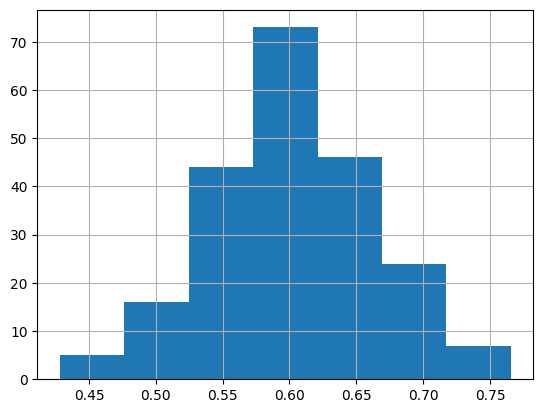

In [389]:
#Draw histogram to see distribution
df['Semantic-Score'].hist(bins=7)

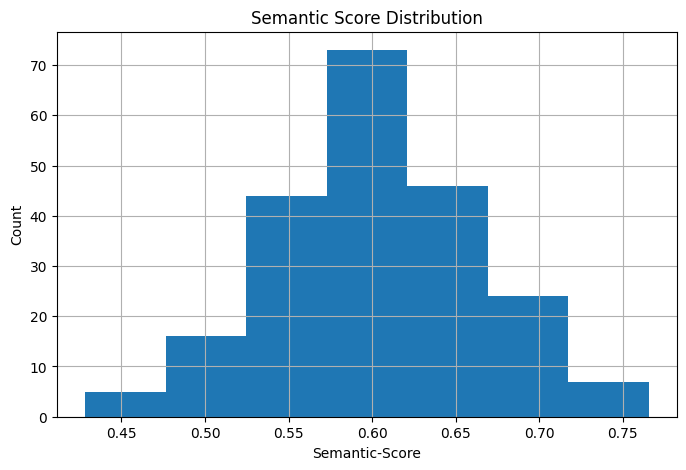

In [390]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(8, 5))

# Plot histogram
df['Semantic-Score'].hist(bins=7)

# Add labels (optional but recommended)
plt.xlabel('Semantic-Score')
plt.ylabel('Count')
plt.title('Semantic Score Distribution')

# # Save as PNG
# plt.savefig('semantic_score_histogram.png', dpi=300, bbox_inches='tight')

# Optionally display
plt.show()

We can see that it follows normal distribution

In [400]:
df['Score-Bin'] = pd.cut(df['Semantic-Score'], bins=7)
# Sample from each bin
n = 0.1
sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(2, int(len(x) * n)), random_state=0))
sample_df = sample_df.reset_index(drop=True)
sample_df['Label'] = ''



/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_85760/2976771521.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(2, int(len(x) * n)), random_state=0))
/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_85760/2976771521.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(2, int(len(x) * n)), random_state=0))


In [410]:
sample_df.shape

(23, 8)

Iterate, and give labels 'L', 'M' or 'H' before continuing 

In [492]:
sample_df[sample_df['Label'] != ''][['Semantic-Score','Original-Comment', 'Agent-Comment', 'Label']]

,Semantic-Score,Original-Comment,Agent-Comment,Label
0,0.475059,"""""""This is called at the end of each request, ...","""""""\nSaves a session.\n\nThis method is intend...",L
1,0.428235,"""""""What environment the app is running in. Thi...","""""""\nDeprecation Warning: `env` method is depr...",L
2,0.512154,"""""""Reload templates when they are changed. Use...","""""""\nReturns the value of `TEMPLATES_AUTO_RELO...",L
3,0.516763,"""""""When used in combination with a ``with`` st...","""""""\nYield a session object for the current te...",M
4,0.568346,"""""""The actual WSGI application. This is not im...","""""""\nWSGI Application Function\n\nThis functio...",L
5,0.555169,"""""""The URL prefix that the static route will b...","""""""\nReturns a static URL path.\n\nThis method...",L
6,0.554580,"""""""Can be overridden in order to modify the re...","""""""\nProcesses the given response by executing...",M
7,0.536651,"""""""What environment the app is running in. Thi...","""""""\nReturns the environment variable as a str...",M
8,0.618780,"""""""Given the return value from a view function...","""""""\nFinalizes a request by processing the res...",M
9,0.604298,"""""""Create a :class:`~flask.ctx.RequestContext`...","""""""\nReturns a new instance of RequestContext ...",M


In [474]:
n = 22

print("""-- LABEL --""")
print(sample_df.iloc[n]["Label"])
print("""-- Original Comment --""")
print(sample_df.iloc[n]["Original-Comment"])
print("""-- Agent Comment --""")
print(sample_df.iloc[n]["Agent-Comment"])

-- LABEL --

-- Original Comment --
"""Convert the value to a valid JSON type and add the tag structure
        around it."""
-- Agent Comment --
"""
Converts a given value to JSON format and returns it as a dictionary.

Args:
    value (t.Any): The value to be converted to JSON format.

Returns:
    dict[str, t.Any]: A dictionary containing the key-value pair where the key is 'tag' and the value is the JSON representation of the input value.
"""


In [475]:
sample_df.iloc[22,7] = "H"

NOW WE HAVE LABELED ALL THE SAMPLE

In [477]:
summary = sample_df.groupby('Label')['Semantic-Score'].agg(
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Max='max'
).reset_index()
summary

,Label,Mean,Std_Dev,Min,Q1,Median,Q3,Max
0,H,0.653979,0.056244,0.593989,0.615387,0.639175,0.684059,0.745833
1,L,0.523460,0.064335,0.428235,0.484333,0.533661,0.565051,0.601796
2,M,0.593764,0.062546,0.516763,0.545616,0.604298,0.622951,0.698150


In [478]:
## Get Q3 of L and Q1 of M
l_max = summary.loc[summary['Label'] == 'L', 'Max'].values[0]
m_min = summary.loc[summary['Label'] == 'M', 'Min'].values[0]
threshold_L_M = (l_max + m_min) / 2

# Get Q3 of M and Q1 of H
m_max = summary.loc[summary['Label'] == 'M', 'Max'].values[0]
h_min = summary.loc[summary['Label'] == 'H', 'Min'].values[0]
threshold_M_H = (m_max + h_min) / 2

# Show results
low_medium = round(threshold_L_M, 3)
medium_high = round(threshold_M_H, 3)

# low_medium = 0.45
# medium_high = 0.65

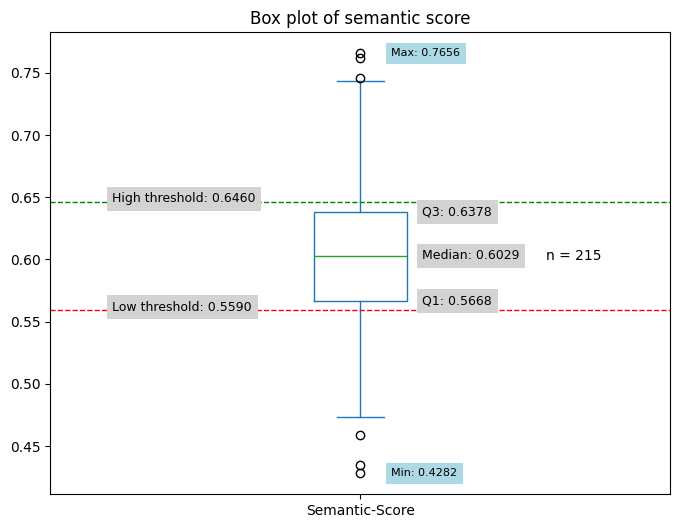

In [484]:
#Create boxplot
stats = df["Semantic-Score"].describe()
q1 = stats['25%']
median = stats['50%']
q3 = stats['75%']
min_val = stats['min']
max_val = stats['max']
count = df["Semantic-Score"].count()

plt.figure(figsize=(8, 6))
df["Semantic-Score"].plot.box()
plt.title("Box plot of semantic score")
plt.text(1.3, df['Semantic-Score'].median(), f'n = {count}', ha='left', va='center')
# Add annotations for Q1, Median, Q3
plt.text(1.1, q1, f'Q1: {q1:.4f}', va='center', ha='left', fontsize=9, bbox=dict(facecolor='lightgray', edgecolor='none'))
plt.text(1.1, median, f'Median: {median:.4f}', va='center', ha='left', fontsize=9, bbox=dict(facecolor='lightgray', edgecolor='none'))
plt.text(1.1, q3, f'Q3: {q3:.4f}', va='center', ha='left', fontsize=9, bbox=dict(facecolor='lightgray', edgecolor='none'))
# Add annotation for thresholds
plt.text(0.6, low_medium, f'Low threshold: {low_medium:.4f}', ha='left', fontsize=9, bbox=dict(facecolor='lightgray', edgecolor='none'))
plt.text(0.6, medium_high, f'High threshold: {medium_high:.4f}', ha='left', fontsize=9, bbox=dict(facecolor='lightgray', edgecolor='none'))

# Add min/max as well if you like
plt.text(1.05, min_val, f'Min: {min_val:.4f}', va='center', ha='left', fontsize=8, bbox=dict(facecolor='lightblue', edgecolor='none'))
plt.text(1.05, max_val, f'Max: {max_val:.4f}', va='center', ha='left', fontsize=8, bbox=dict(facecolor='lightblue', edgecolor='none'))

plt.axhline(y=low_medium, color='red', linestyle='--', linewidth=1, label='Low-Medium Threshold')
plt.axhline(y=medium_high, color='green', linestyle='--', linewidth=1, label='Medium-High Threshold')

plt.show()
# plt.savefig("semantic_score_box_plot.png")